In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import defaultdict

# plot settings
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["font.size"] = 13
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["axes.axisbelow"] = True

TEX_PLOTS = False

if TEX_PLOTS:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{palatino}
     \usepackage{newpxmath}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")

In [109]:
# data generated by running the following command in this directory:
#  $ ./run_model.py data/time_steps_data.npz --repetitions=75 --n-cores=6 --collect-timeseries=True --time-steps=2000
# which took about 1 hour on my shitty 2016 macbook
data_30_100 = np.load("data/time_steps_data_30pl_100_l.npz", allow_pickle=True)
dfs_30_100 = [pd.DataFrame.from_dict(d) for d in data_30_100["results"]]
t = len(dfs_30_100[0])

data_60_50 = np.load("data/time_steps_data_60pl_50_l.npz", allow_pickle=True)
dfs_60_50 = [pd.DataFrame.from_dict(d) for d in data_60_50["results"]]

data_120_25 = np.load("data/time_steps_data_120pl_25_l.npz", allow_pickle=True)
dfs_120_25 = [pd.DataFrame.from_dict(d) for d in data_120_25["results"]]

In [110]:
n_extinctions = 0
for df in dfs_30_100:
    if df["Ant Biomass"].iloc[-1] == 0:
        n_extinctions += 1
print(f"{n_extinctions} out of {len(dfs_30_100)} runs went extinct")

135 out of 200 runs went extinct


In [111]:
n_extinctions = 0
for df in dfs_60_50:
    if df["Ant Biomass"].iloc[-1] == 0:
        n_extinctions += 1
print(f"{n_extinctions} out of {len(dfs_60_50)} runs went extinct")

79 out of 200 runs went extinct


In [112]:
n_extinctions = 0
for df in dfs_120_25:
    if df["Ant Biomass"].iloc[-1] == 0:
        n_extinctions += 1
print(f"{n_extinctions} out of {len(dfs_120_25)} runs went extinct")

48 out of 200 runs went extinct


In [113]:
extinct_dfs_30_100 = []
non_extinct_dfs_30_100 = []
for df in dfs_30_100:
    if df["Ant Biomass"].iloc[-1] < 5:
        extinct_dfs_30_100.append(df)
    else: 
        non_extinct_dfs_30_100.append(df)
        
extinct_dfs_60_50 = []
non_extinct_dfs_60_50 = []
for df in dfs_60_50:
    if df["Ant Biomass"].iloc[-1] < 5:
        extinct_dfs_60_50.append(df)
    else: 
        non_extinct_dfs_60_50.append(df)
   
extinct_dfs_120_25 = []
non_extinct_dfs_120_25 = []
for df in dfs_120_25:
    if df["Ant Biomass"].iloc[-1] < 5:
        extinct_dfs_120_25.append(df)
    else: 
        non_extinct_dfs_120_25.append(df)

In [132]:
cols = ("Fungus Biomass", "Ant Biomass", "Fraction forager ants", "Dormant caretakers fraction")
colors = ("black", "tab:brown", "tab:red", "tab:green")

In [133]:
def plot_mean_std(list_dfs, title):
    fig = plt.figure(figsize=(15, 4))

    concat_df = pd.concat(list_dfs)
    grouped_df = concat_df.groupby(level=0)
    means_df = grouped_df.mean()
    std_df = grouped_df.std()
    

    for i, (measure, color) in enumerate(zip(cols, colors)):
            ax = fig.add_subplot(1, len(cols), i+1)
            ax.plot(range(t), means_df[measure], label=measure, color=color)
            mean_min_std = means_df[measure] - std_df[measure]
            mean_min_std[mean_min_std < 0] = 0

            ax.fill_between(range(t),
                            mean_min_std, means_df[measure] + std_df[measure],
                            alpha=0.4, color=color)
            ax.set_xlabel("$t$")
            ax.set_ylabel(f"{measure}")

    plt.tight_layout()
    plt.title(title)
    plt.show()

def plot_runs(list_dfs, title):
    fig = plt.figure(figsize=(15, 4))


    for i, measure in enumerate(cols):
            ax = fig.add_subplot(1, len(cols), i+1)
            for df in list_dfs: 
                ax.plot(range(t), df[measure], label=measure)
            ax.set_xlabel("$t$")
            ax.set_ylabel(f"{measure}")
    
    plt.title(title)
    plt.tight_layout()
    plt.show()


## Experiment 1

#### extinction

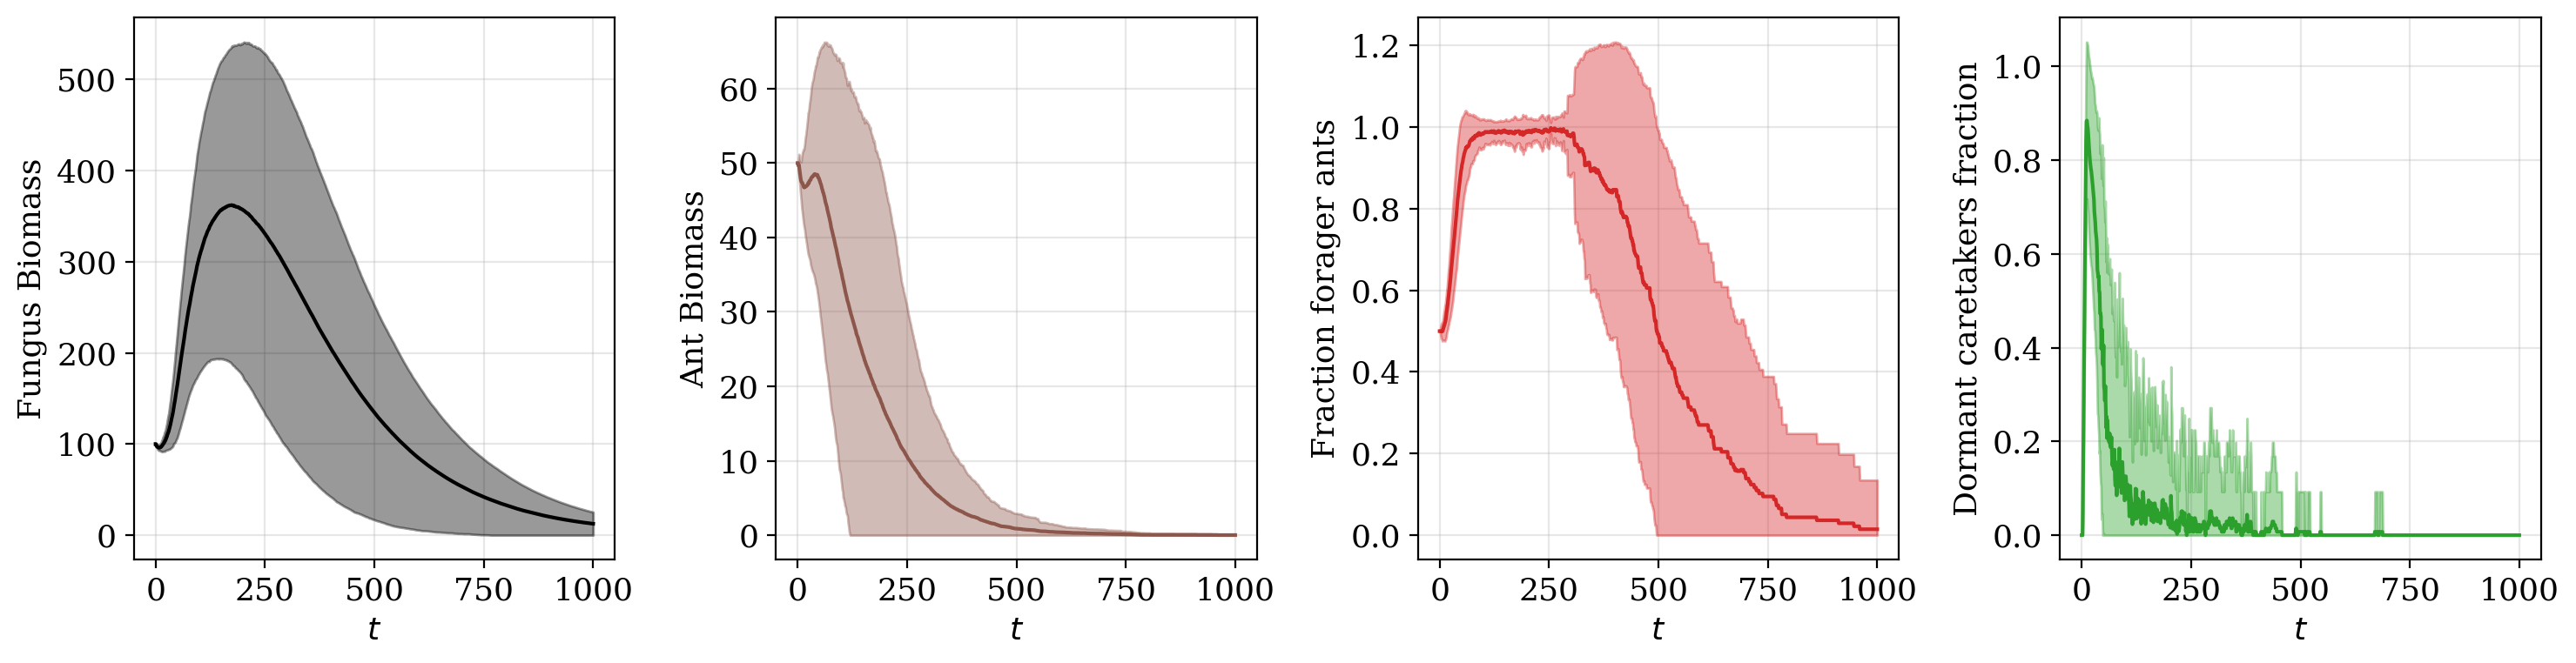

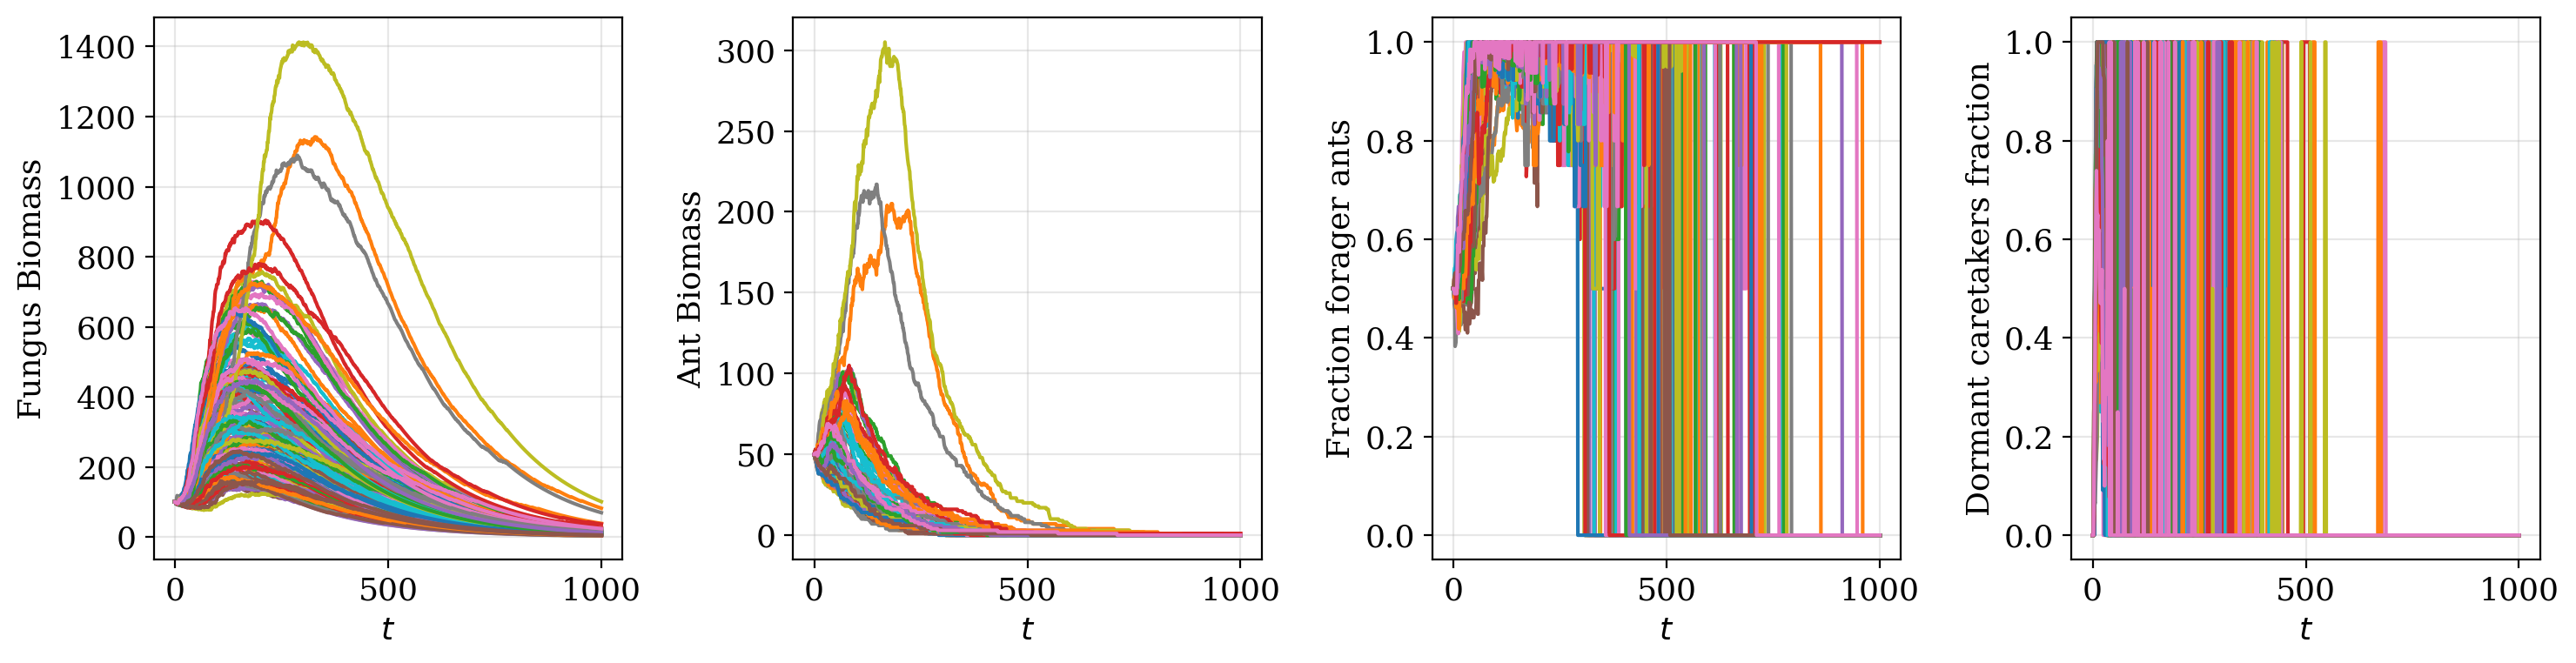

In [134]:
plot_mean_std(extinct_dfs_30_100, title = "")
plot_runs(extinct_dfs_30_100, title = "")

#### non-extinction

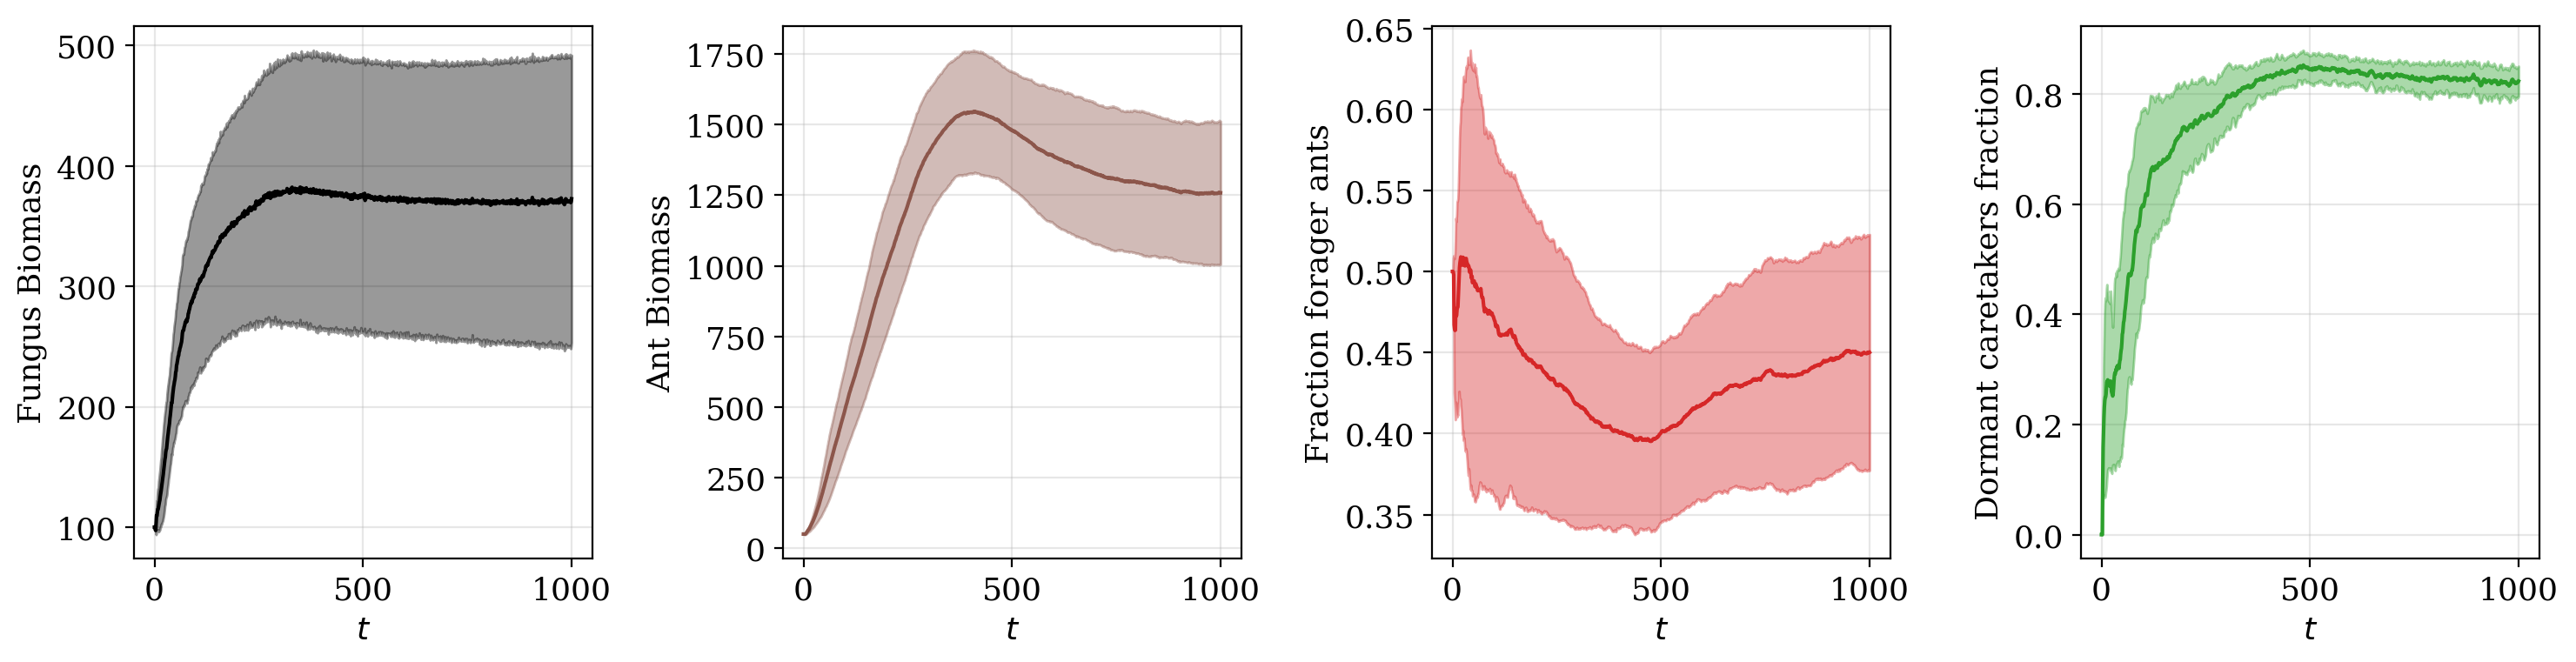

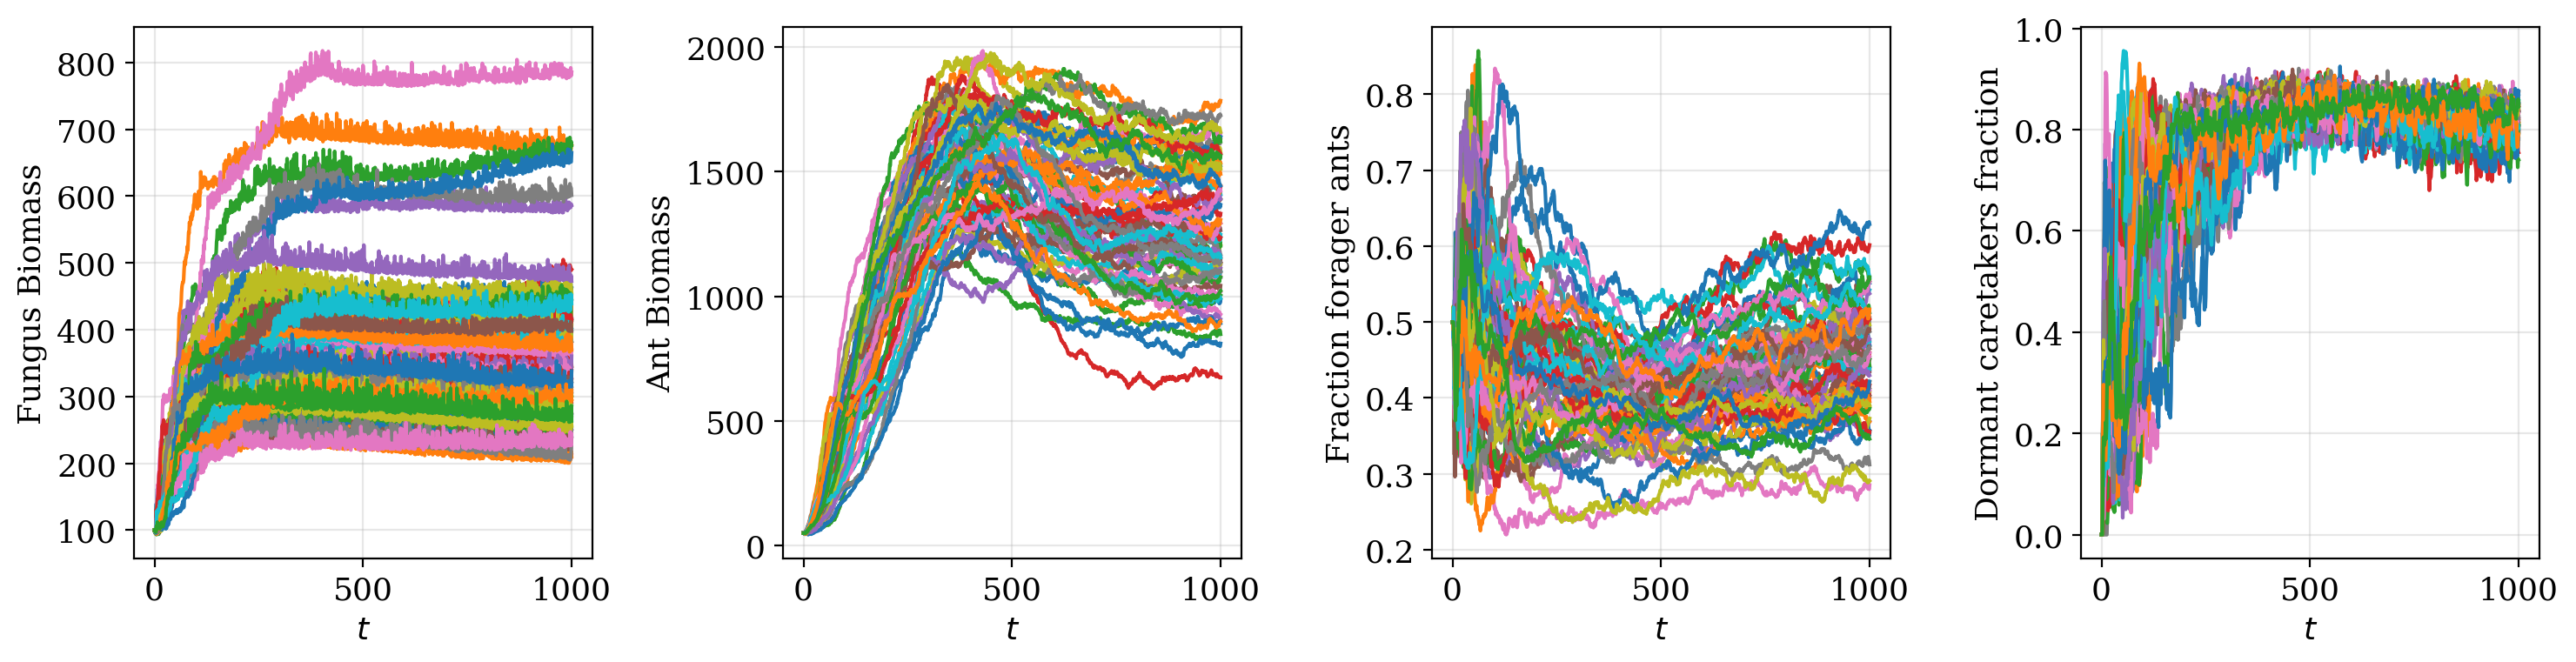

In [135]:
plot_mean_std(non_extinct_dfs_30_100, title = "")
plot_runs(non_extinct_dfs_30_100, title = "")

## Experiment 2

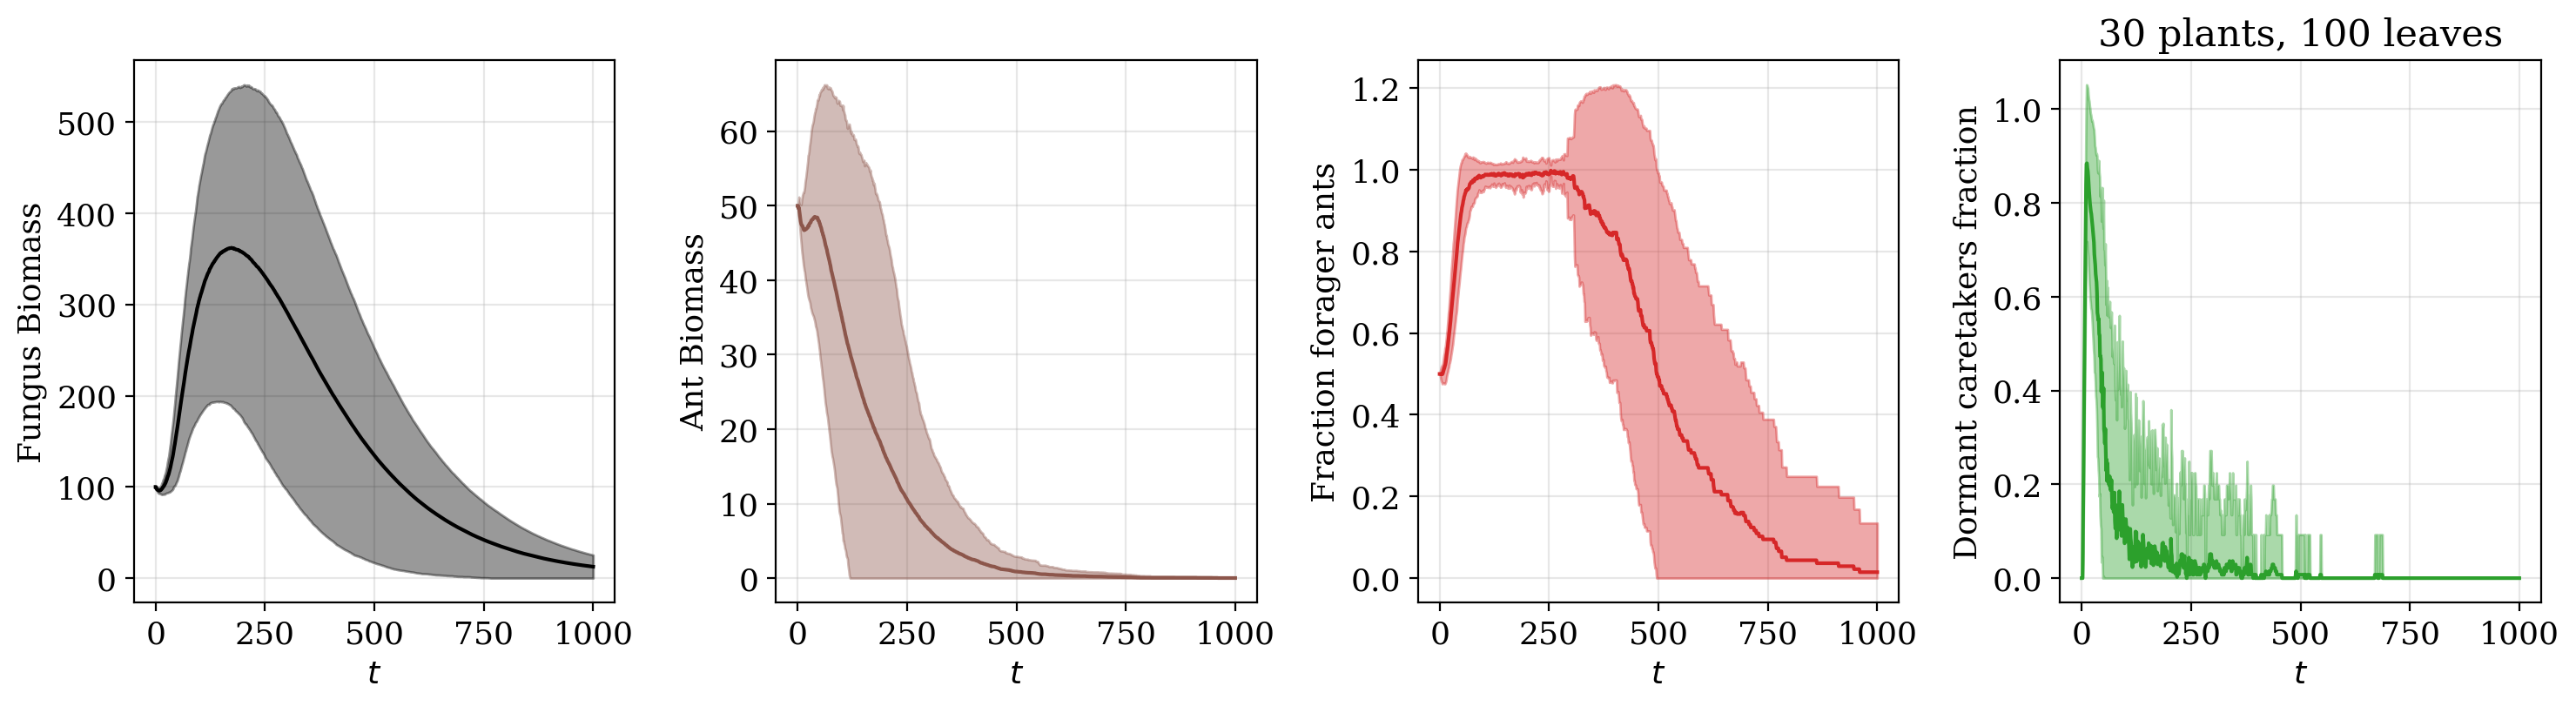

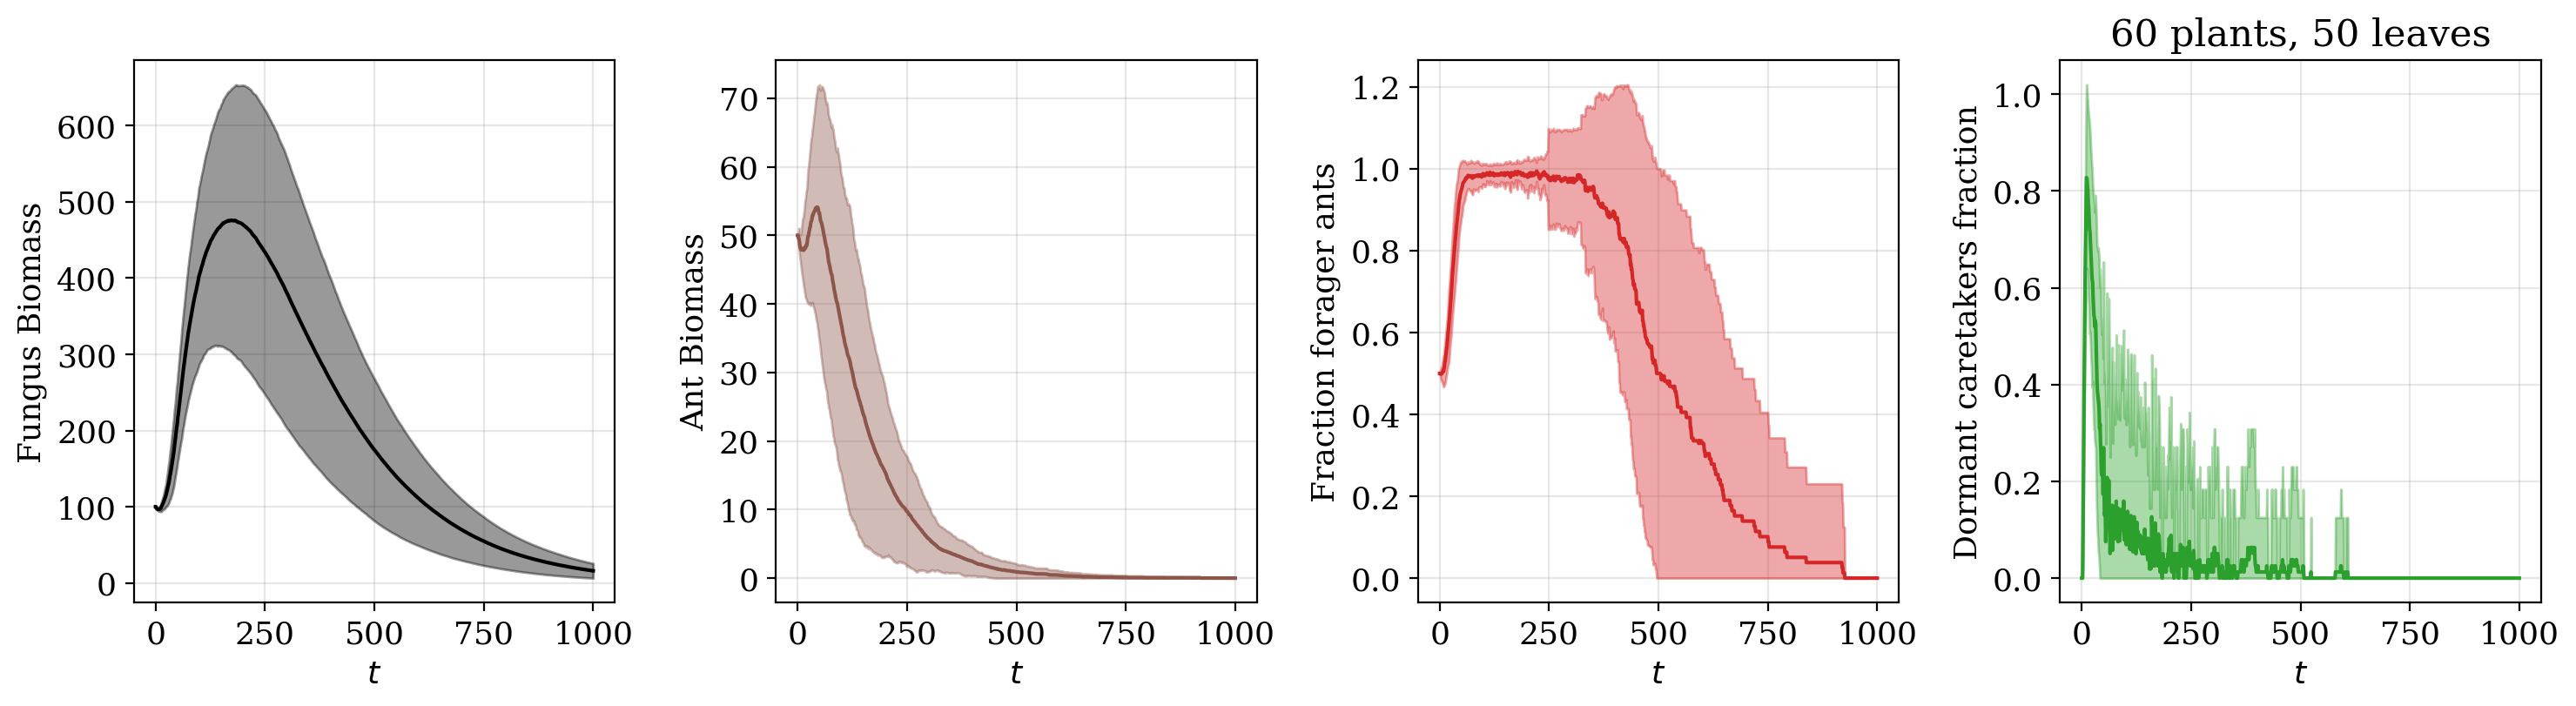

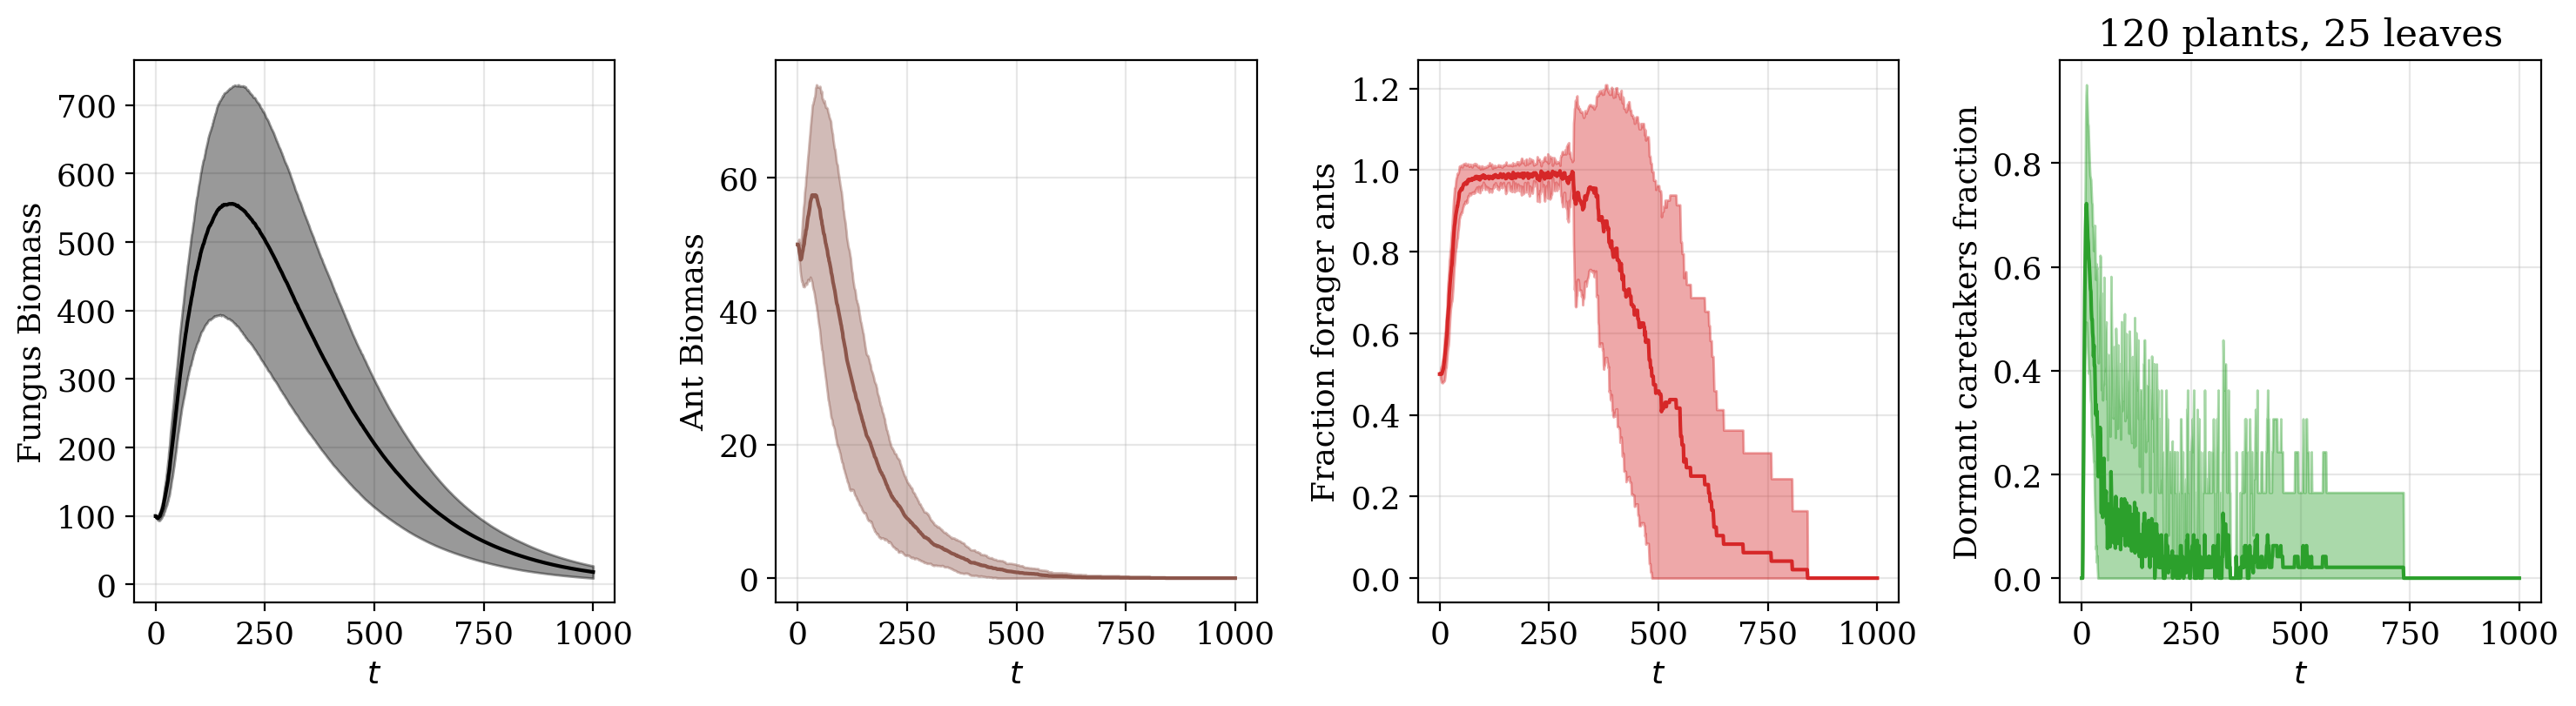

In [118]:
plot_mean_std(extinct_dfs_30_100, title = "30 plants, 100 leaves")
plot_mean_std(extinct_dfs_60_50, title = "60 plants, 50 leaves")
plot_mean_std(extinct_dfs_120_25, title = "120 plants, 25 leaves")

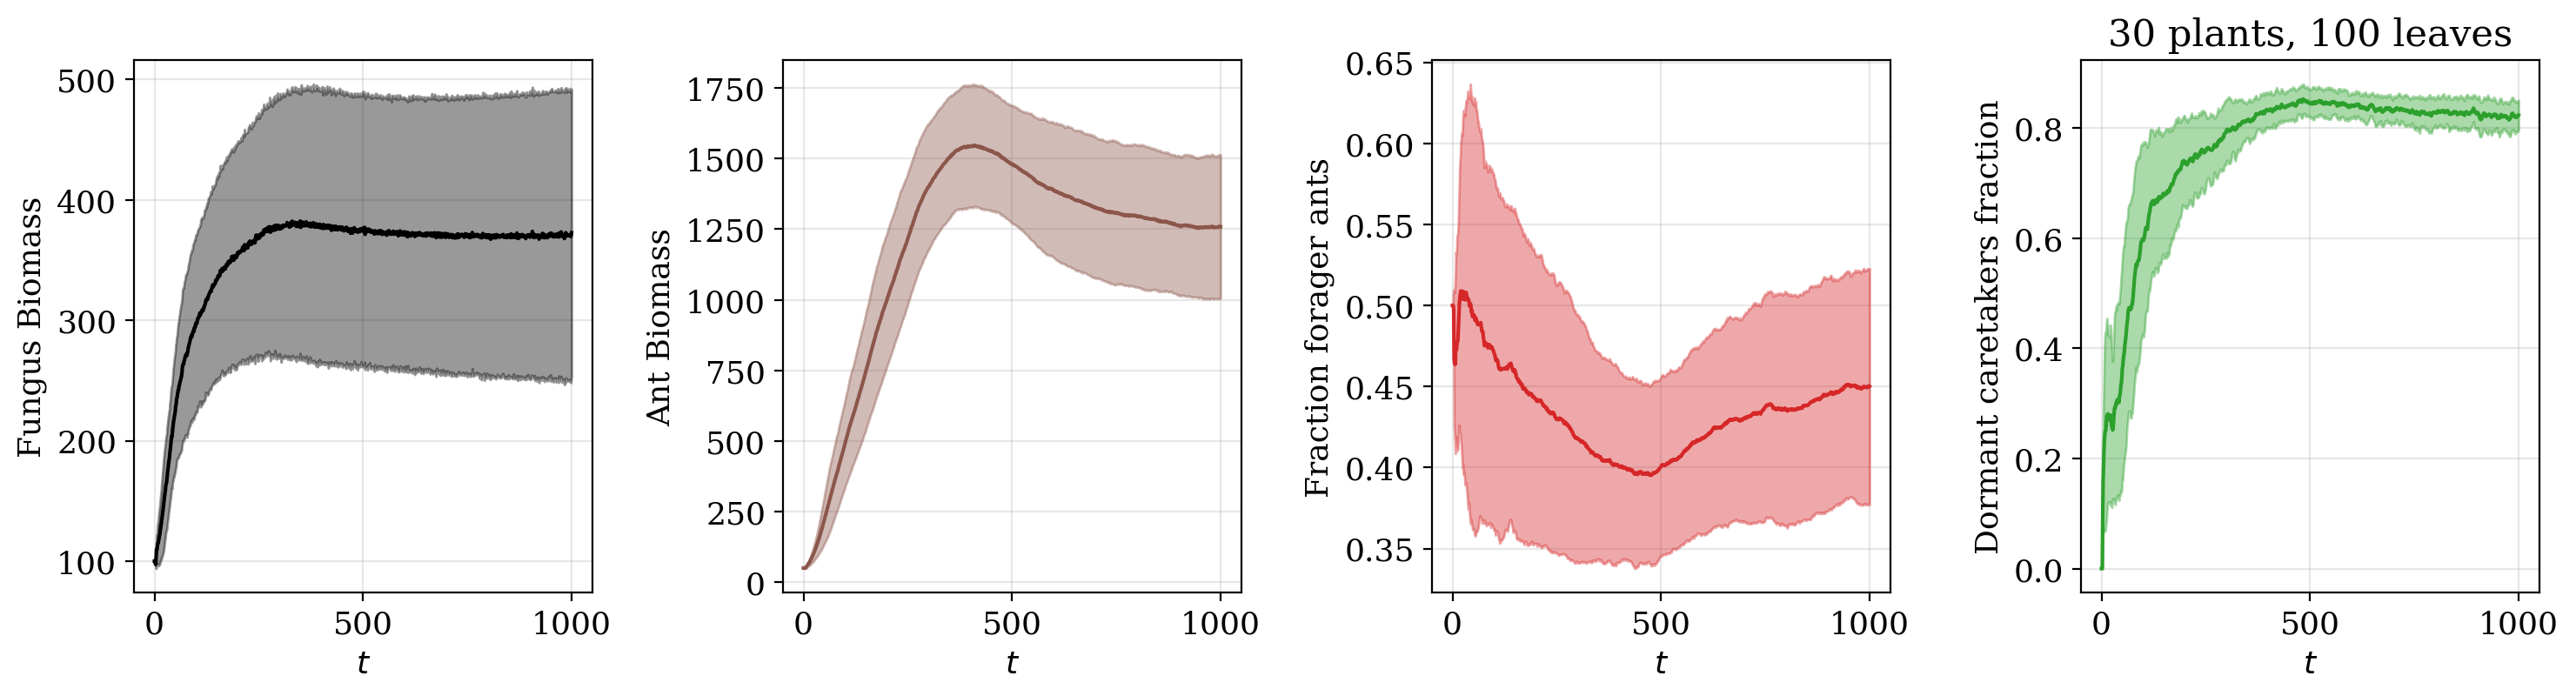

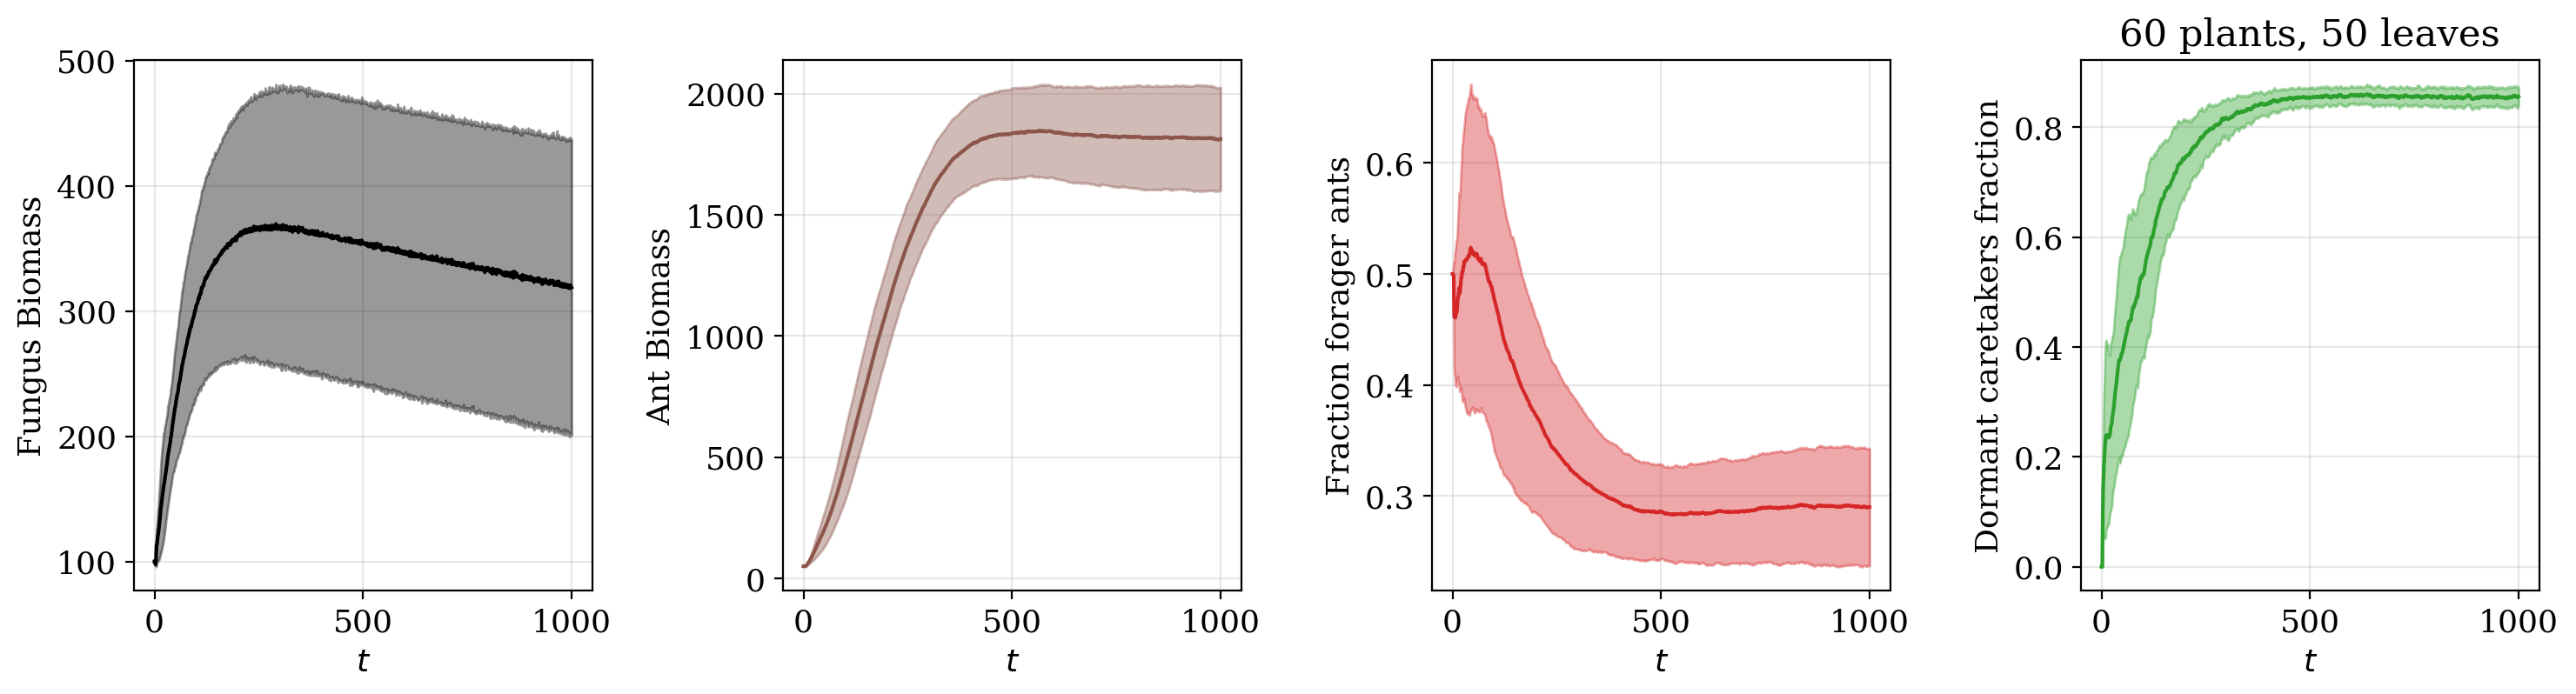

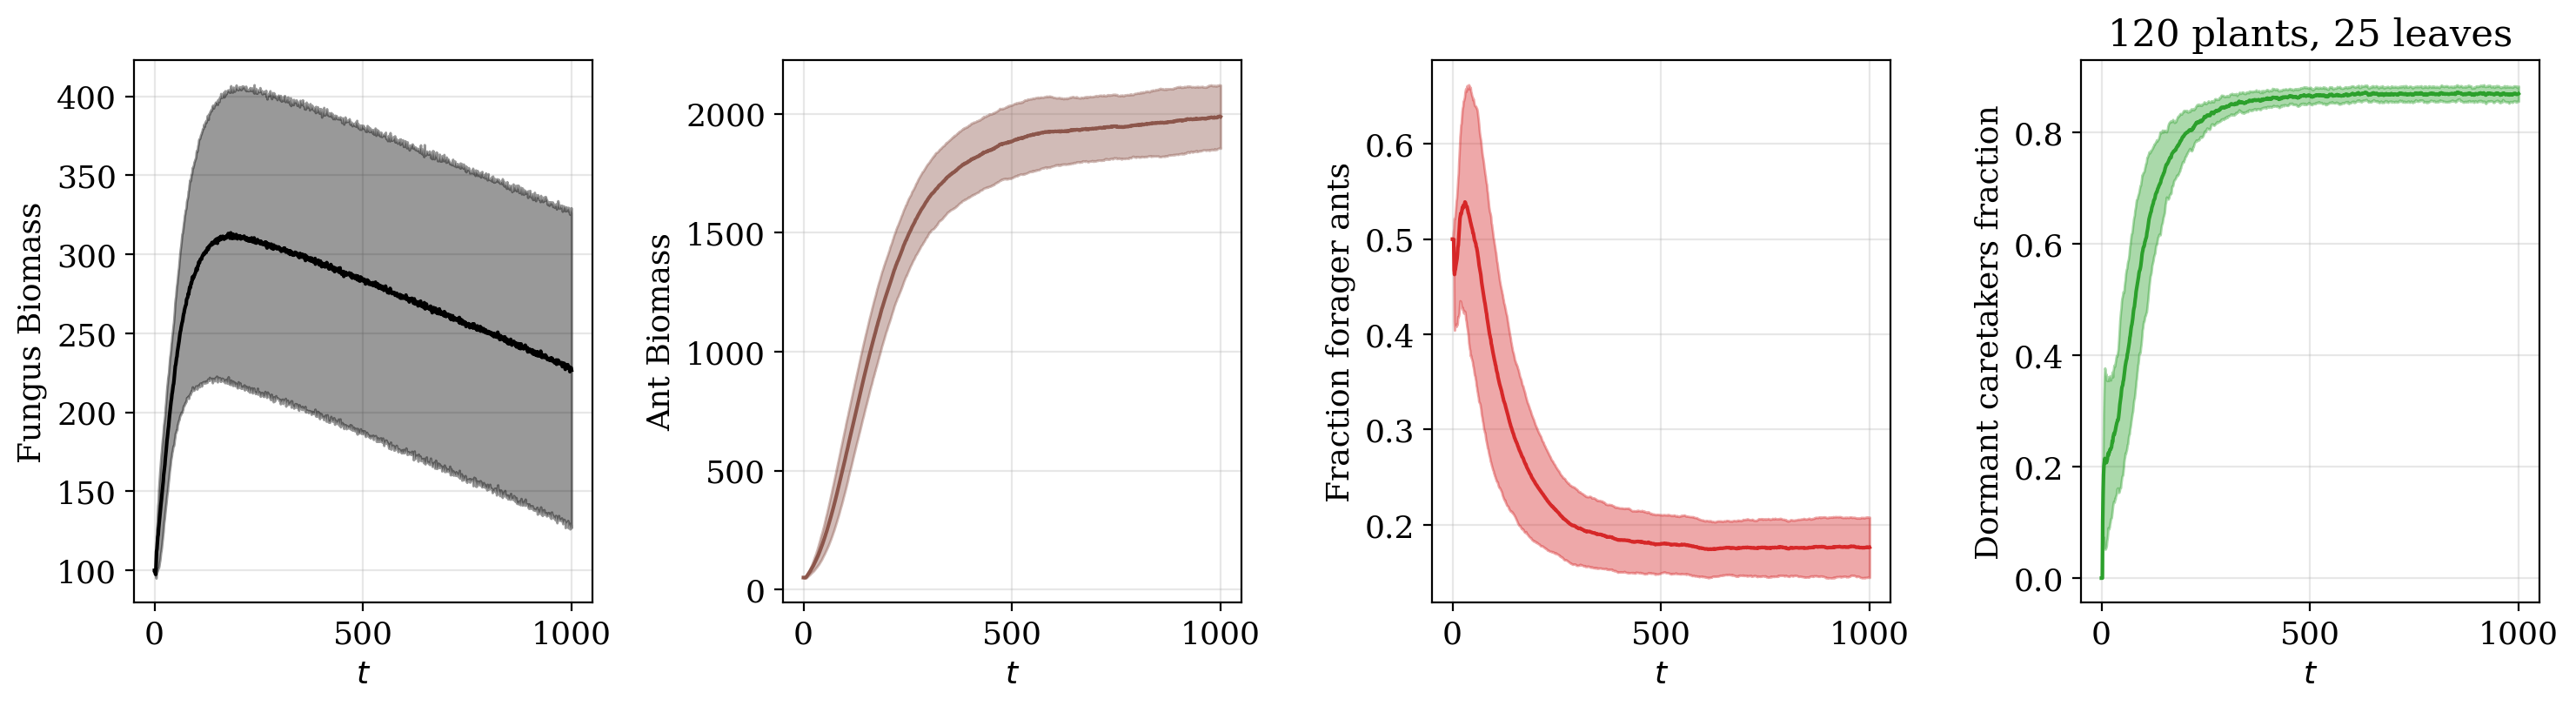

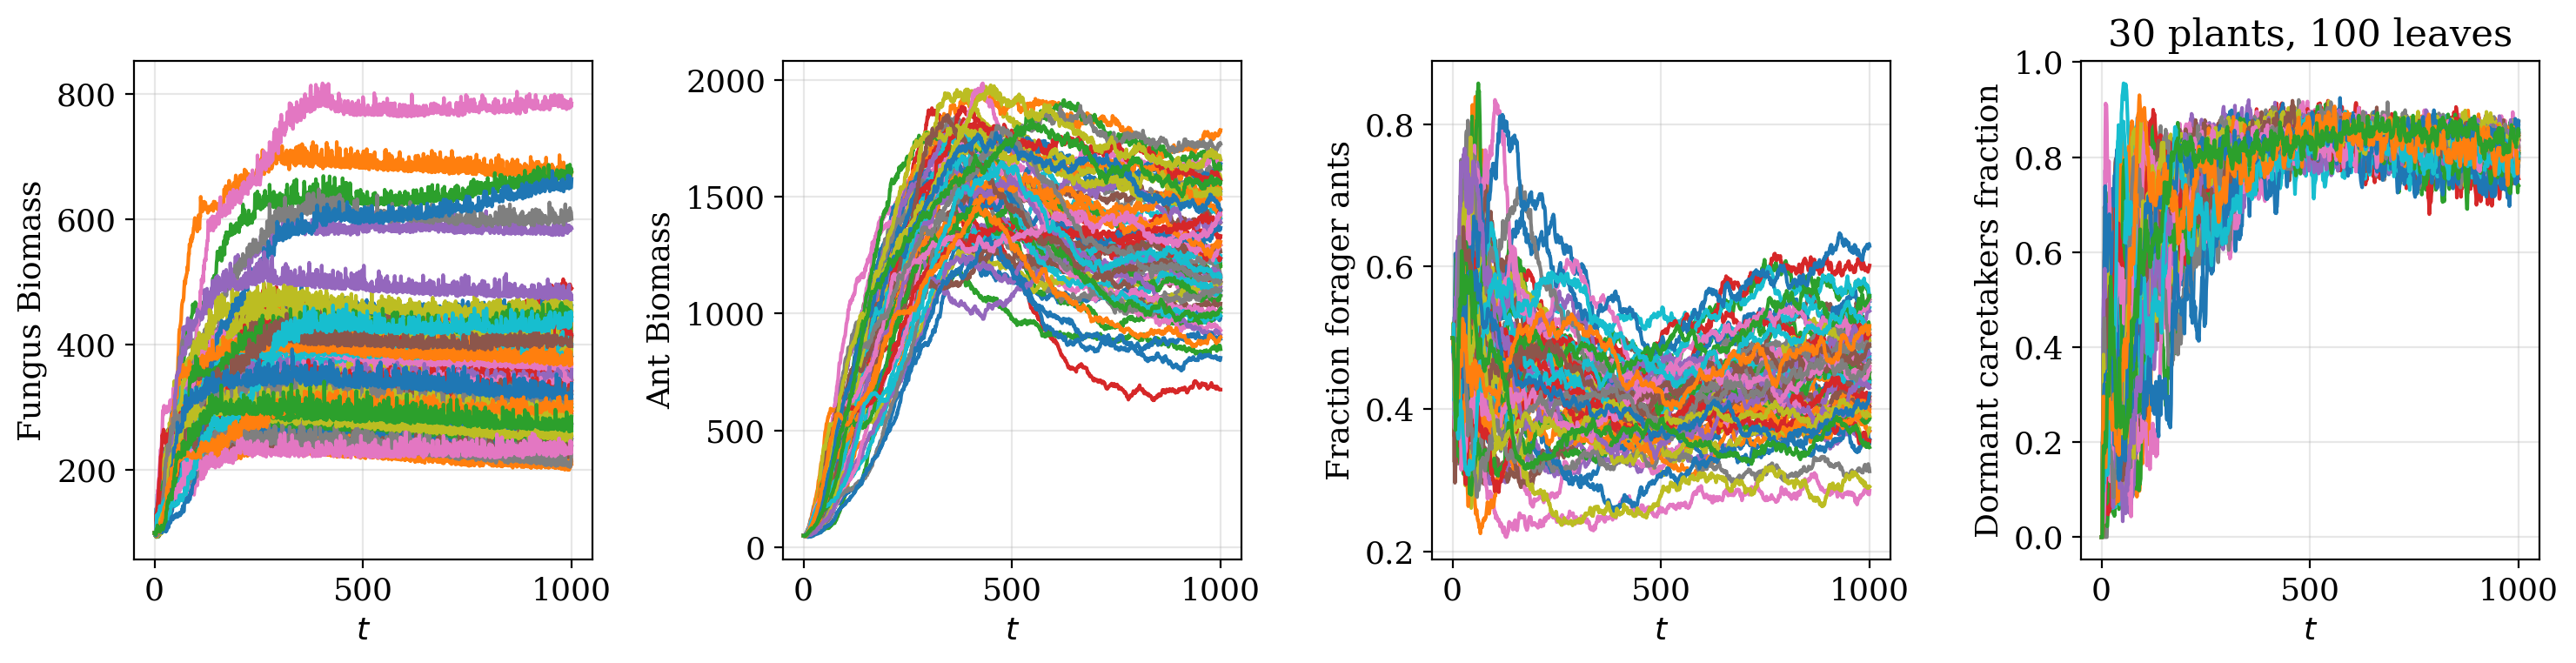

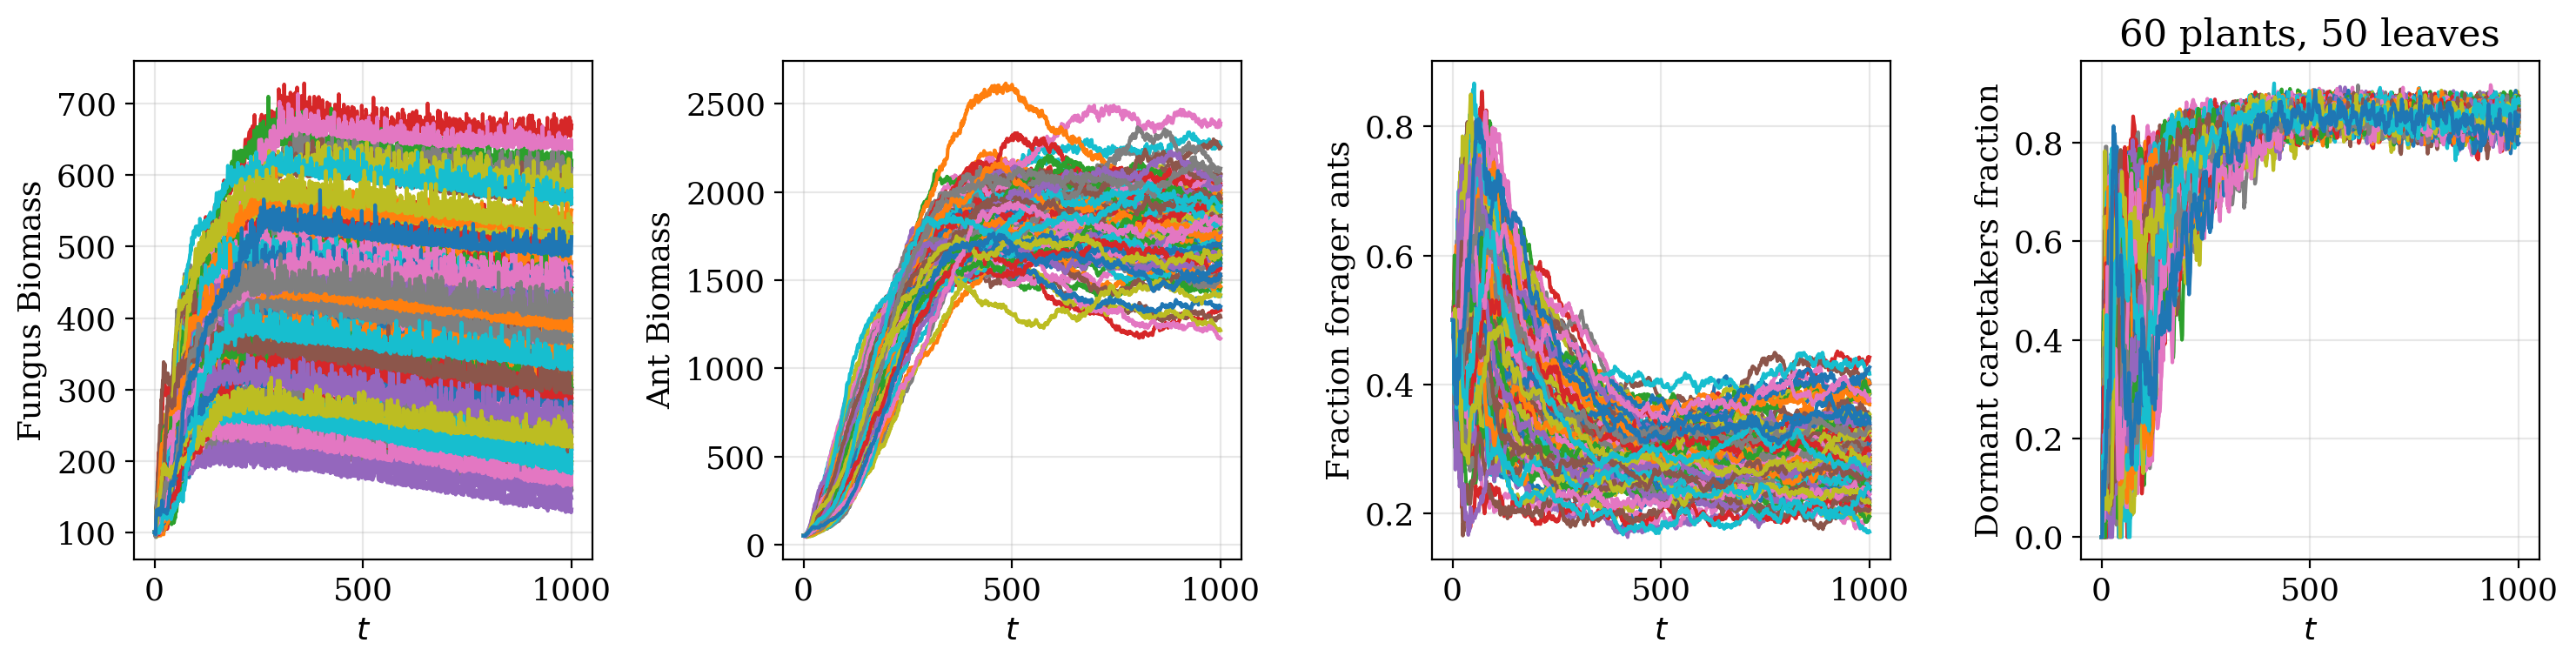

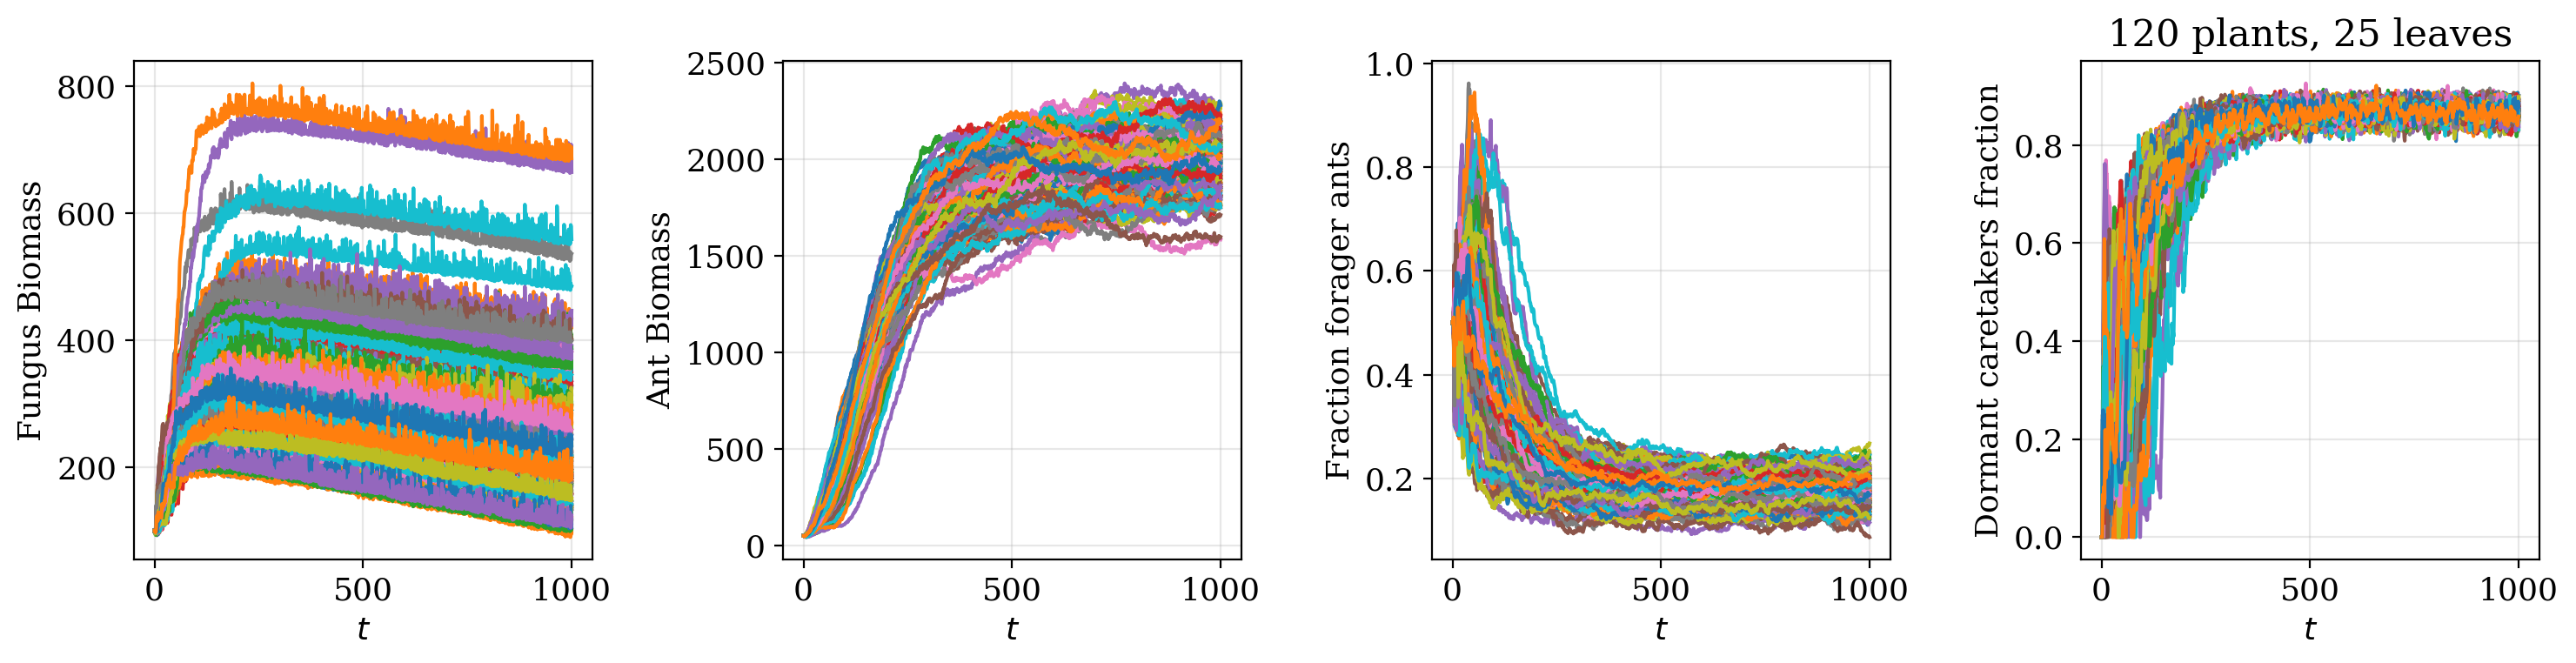

In [119]:
plot_mean_std(non_extinct_dfs_30_100, title = "30 plants, 100 leaves")
plot_mean_std(non_extinct_dfs_60_50, title = "60 plants, 50 leaves")
plot_mean_std(non_extinct_dfs_120_25, title = "120 plants, 25 leaves")

plot_runs(non_extinct_dfs_30_100, title = "30 plants, 100 leaves")
plot_runs(non_extinct_dfs_60_50, title = "60 plants, 50 leaves")
plot_runs(non_extinct_dfs_120_25, title = "120 plants, 25 leaves")